# Experiment Example

In [1]:
import capymoa 
from capymoa.regressor import FIMTDD, KNNRegressor, AdaptiveRandomForestRegressor, SOKNL
from capymoa.prediction_interval import AdaPI, MVE
from capymoa.evaluation import prequential_evaluation, prequential_evaluation_multiple_learners
from capymoa.evaluation.visualization import plot_windowed_results, plot_prediction_interval
from capymoa.stream import stream_from_file

# Load stream
stream  = stream_from_file('new_generated_datasets/abalone_incremental.arff')

## Regression

FIMTDD Cumulative:
	RMSE: 2.527452581118187	Adjusted R2: 0.3948240335924923
KNN Cumulative:
	RMSE: 2.672175384025469	Adjusted R2: 0.32357214009812685
ARF Cumulative:
	RMSE: 2.5061539900638743	Adjusted R2: 0.4049805735765514
SOKNL Cumulative:
	RMSE: 2.474346099476796	Adjusted R2: 0.4199885956864252


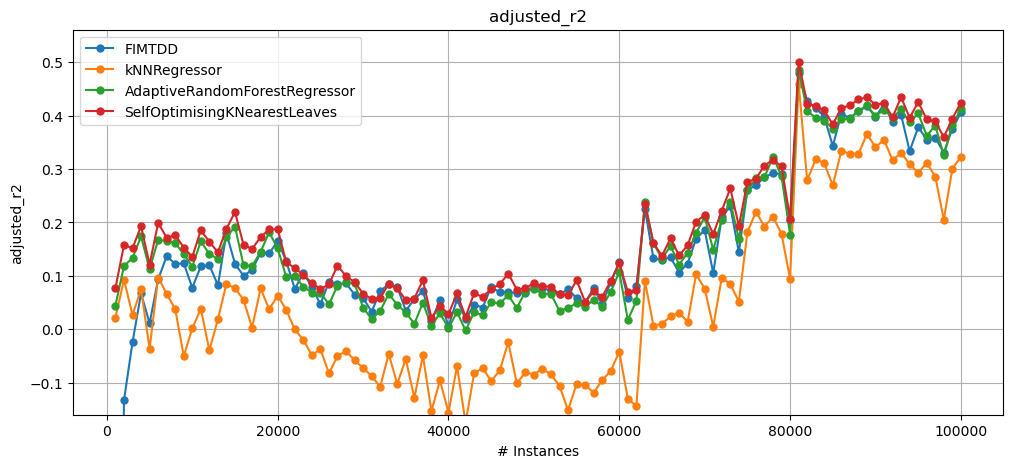

In [2]:
fimtdd_learner = FIMTDD(schema=stream.get_schema(), grace_period=200, split_confidence=0.01)
knn_learner = KNNRegressor(schema=stream.get_schema(), k=5)
arf_reg_learner = AdaptiveRandomForestRegressor(schema=stream.get_schema(), ensemble_size=30)
soknl_learner = SOKNL(schema=stream.get_schema(), ensemble_size=30)

fimtdd_result = prequential_evaluation(stream=stream, learner=fimtdd_learner)
knn_result = prequential_evaluation(stream=stream, learner=knn_learner)
arf_reg_result = prequential_evaluation(stream=stream, learner=arf_reg_learner)
soknl_result = prequential_evaluation(stream=stream, learner=soknl_learner)


print(f'FIMTDD Cumulative:\n\tRMSE: {fimtdd_result.cumulative.rmse()}\tAdjusted R2: {fimtdd_result.cumulative.adjusted_r2()}')
print(f'KNN Cumulative:\n\tRMSE: {knn_result.cumulative.rmse()}\tAdjusted R2: {knn_result.cumulative.adjusted_r2()}')
print(f'ARF Cumulative:\n\tRMSE: {arf_reg_result.cumulative.rmse()}\tAdjusted R2: {arf_reg_result.cumulative.adjusted_r2()}')
print(f'SOKNL Cumulative:\n\tRMSE: {soknl_result.cumulative.rmse()}\tAdjusted R2: {soknl_result.cumulative.adjusted_r2()}')

plot_windowed_results(fimtdd_result, knn_result, arf_reg_result, soknl_result, metric='adjusted_r2', ymin=-0.1, save_only=False)

## Prediction Interval

AdaPI Cumulative:
	Coverage: 95.89	NMPIW: 52.28
MVE Cumulative:
	Coverage: 93.92	NMPIW: 47.65


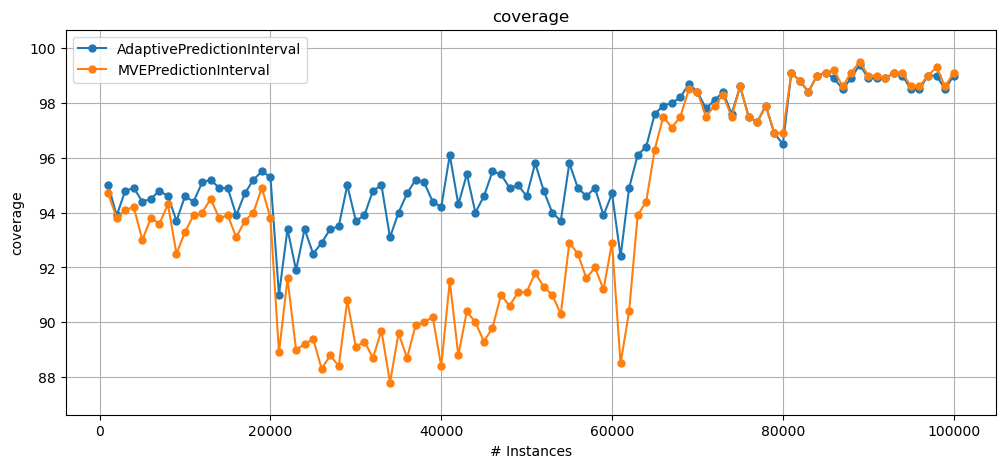

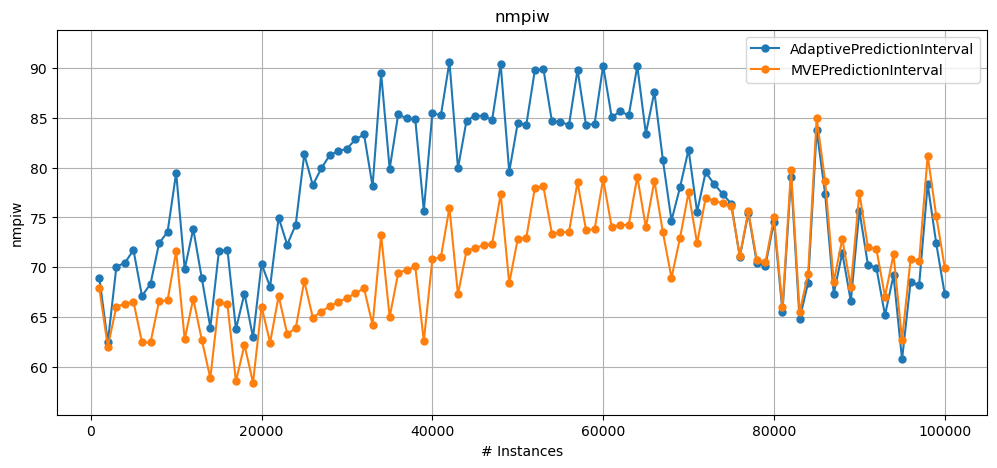

In [3]:
adapi_learner = AdaPI(schema=stream.get_schema(), base_learner=knn_learner)
mve_learner = MVE(schema=stream.get_schema(), base_learner=knn_learner)

adapi_result = prequential_evaluation(stream=stream, learner=adapi_learner, optimise=False, store_predictions=True, store_y=True)
mve_result = prequential_evaluation(stream=stream, learner=mve_learner, optimise=False, store_predictions=True, store_y=True)

print(f'AdaPI Cumulative:\n\tCoverage: {adapi_result.cumulative.coverage()}\tNMPIW: {adapi_result.cumulative.nmpiw()}')
print(f'MVE Cumulative:\n\tCoverage: {mve_result.cumulative.coverage()}\tNMPIW: {mve_result.cumulative.nmpiw()}')

plot_windowed_results(adapi_result, mve_result, metric='coverage', save_only=False)
plot_windowed_results(adapi_result, mve_result, metric='nmpiw', save_only=False)

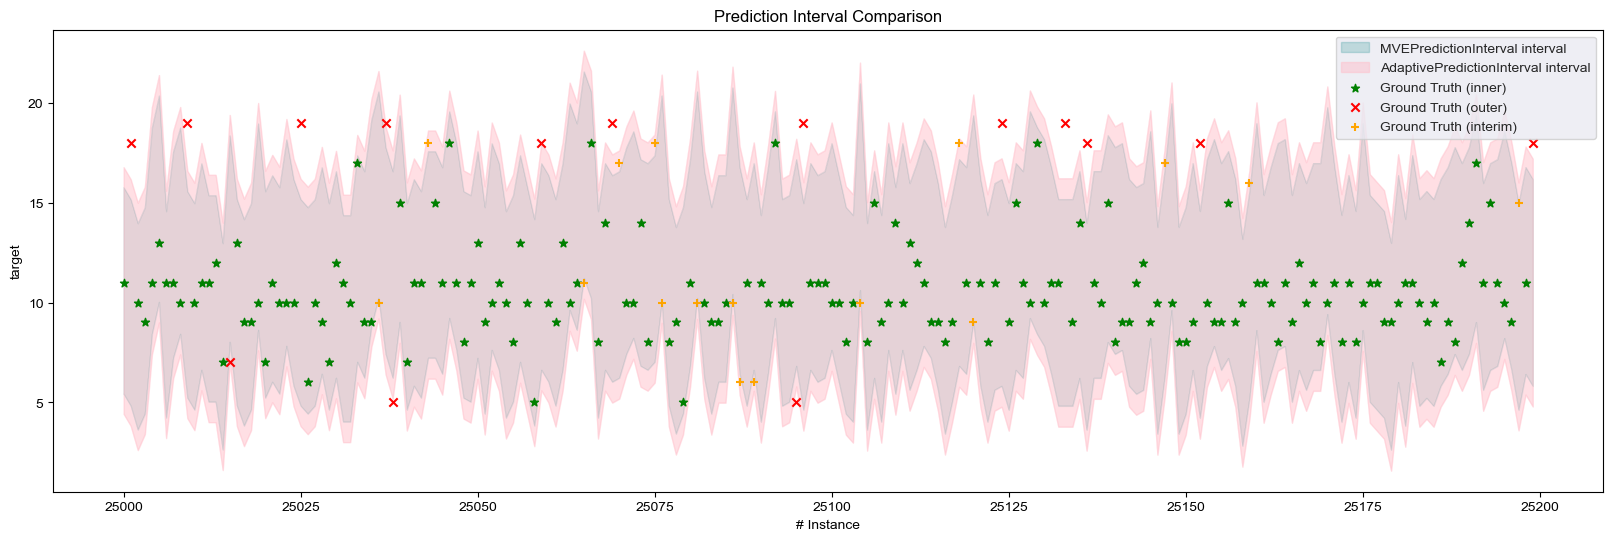

In [4]:
plot_prediction_interval(
    mve_result,
    adapi_result,
    start=25000,
    end=25200,
    colors=[ "teal","pink",],
    plot_predictions=False,
    save_only=False,
)